<a href="https://colab.research.google.com/github/rks16/Python-new-/blob/main/DTTE_Colab_tutorial_12_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Perceptron and Gradient Descent
## Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

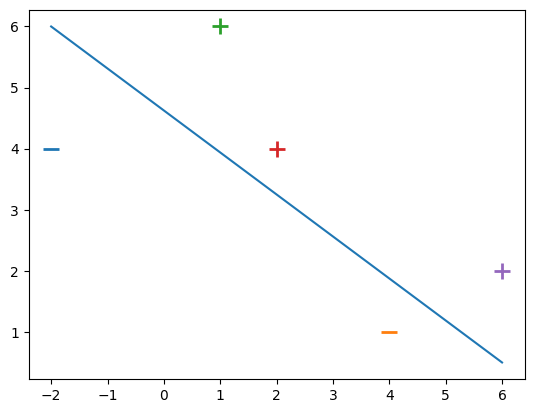

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

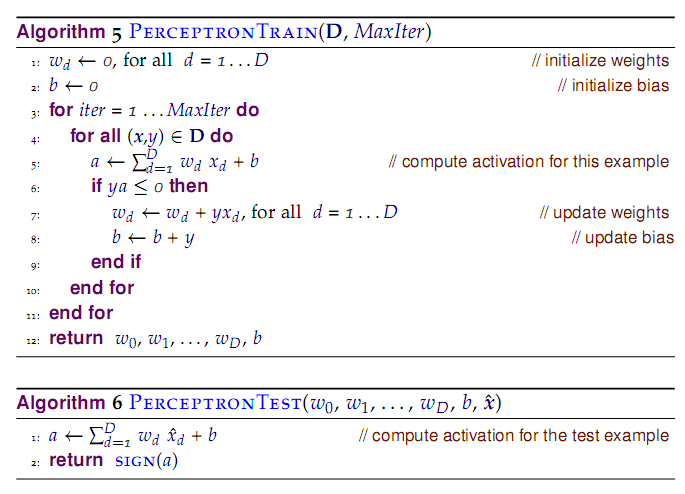

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

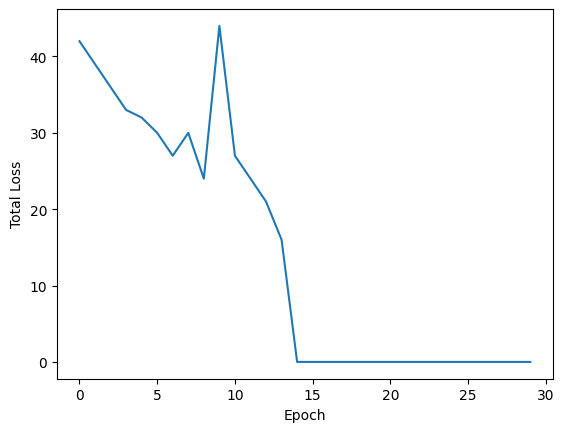

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

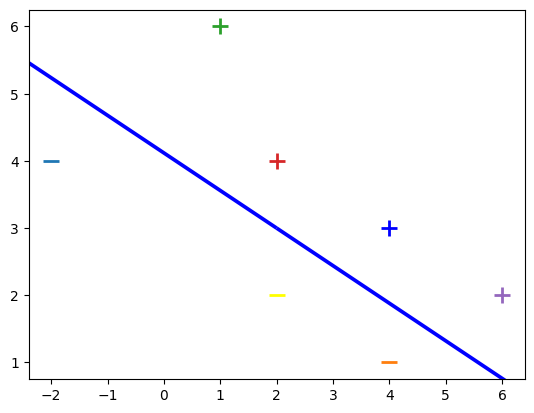

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

4. In the perceptron learning algorithm, explain the purpose of the bias term added to each data sample. How does the bias term influence the decision boundary and the overall classification process?

5. In the perceptron_algo_plot function, the total loss is computed and plotted for each epoch during training. How does the behavior of the loss plot change as you increase or decrease the learning rate (η)? Discuss the trade-offs between using a larger or smaller learning rate in terms of convergence speed and stability.


In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


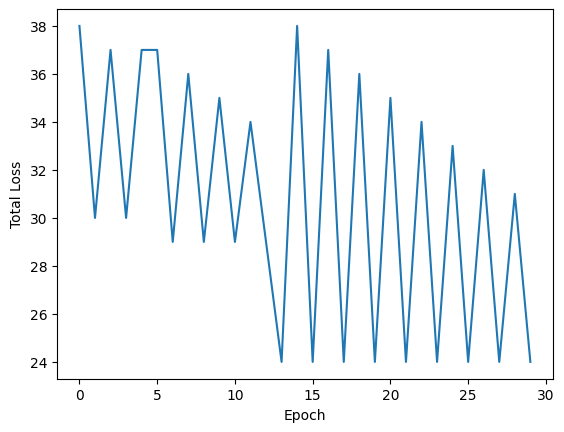

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

# Answers

Answer 1 :


In [17]:
import pandas as pd
sonar_data = pd.read_csv("/content/Copy of sonar data.csv", header = None)
sonar_data.shape

(208, 61)

In [14]:
sonar_data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [18]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [27]:
sonar_data[60].replace({'M': 1, 'R': 0}, inplace=True)


In [28]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [29]:
sonar_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,1


array([0.0491, 0.0279, 0.0592, 0.127 , 0.1772, 0.1908, 0.2217, 0.0768,
       0.1246, 0.2028, 0.0947, 0.2497, 0.2209, 0.3195, 0.334 , 0.3323,
       0.278 , 0.2975, 0.2948, 0.1729, 0.3264, 0.3834, 0.3523, 0.541 ,
       0.5228, 0.4475, 0.534 , 0.5323, 0.3907, 0.3456, 0.4091, 0.4639,
       0.558 , 0.5727, 0.6355, 0.7563, 0.6903, 0.6176, 0.5379, 0.5622,
       0.6508, 0.4797, 0.3736, 0.2804, 0.1982, 0.2438, 0.1789, 0.1706,
       0.0762, 0.0238, 0.0268, 0.0081, 0.0129, 0.0161, 0.0063, 0.0119,
       0.0194, 0.014 , 0.0332, 0.0439])

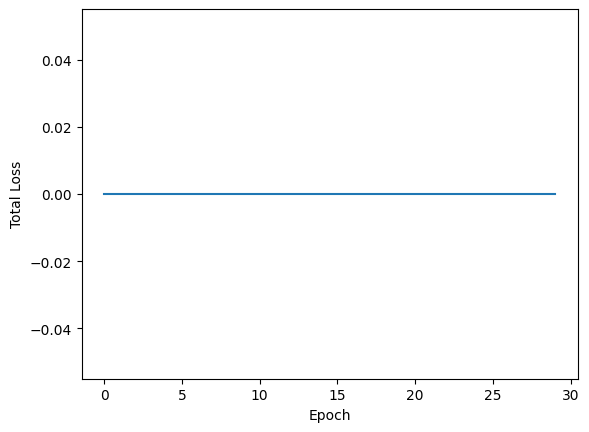

In [30]:
X = np.array(sonar_data.drop(columns=60, axis=1))
Y = np.array(sonar_data[60])

perceptron_algo_plot(X, Y)

array([ -0.88890272,  -0.29652741, -16.02719392,   5.8902124 ,
        13.26656128,  -8.09276138,  -9.23986133, -11.99715189,
        17.67006767,   1.05291344,  19.60254684,  30.05656297,
        -4.55269222, -17.11268652,  -5.61849918,  -3.96936424,
        -6.8722265 ,   7.01447187,   6.41767278,  -0.04670433,
         5.3010304 ,   3.39585249,   4.9370266 ,  15.04046162,
        -3.10160808, -19.70057614,   3.61749889,  -0.79104234,
         4.21253586,  20.07475736, -25.49163128,  14.8678778 ,
        -0.74963882, -11.66390201,  -7.98097401,  -6.92491198,
       -15.7951204 ,   6.41595034,  13.84340546,   7.7902878 ,
        10.6646613 , -15.47196436,   0.11277678,   7.53214167,
         5.89757142,  23.82329138,  18.31002717,   6.87890051,
        16.12465322, -29.8467794 ,  -5.20572673, -10.96422773,
        10.03606892,  -1.5360622 , -11.03871131,  -7.91420617,
         0.21224723,  16.68275541,  -2.09600071,   1.72098267])

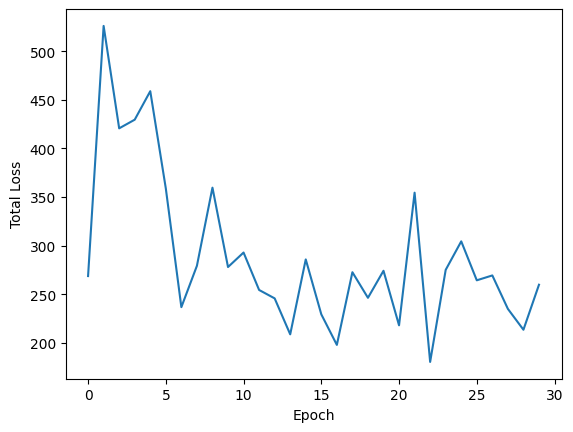

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature = scaler.fit_transform(X)


perceptron_algo_plot(feature, Y)

Answer 2:


The learning rate is a major factor in determining how quickly an algorithm converges. When the learning rate is set too low, the convergence process can be slowed, this increases the need for number of iterations to reach a best solution.

Answer 3:

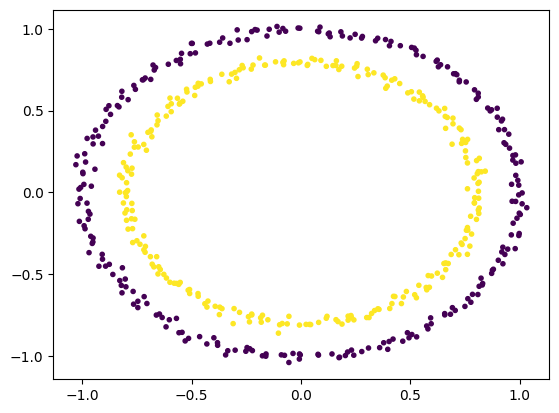

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X_data, Y_data = make_circles(n_samples = 500, noise = 0.02)

# visualizing data
plt.scatter(X_data[:, 0], X_data[:, 1], c = Y_data, marker = '.')
plt.show()

[ 0.40145075 -0.32953069]


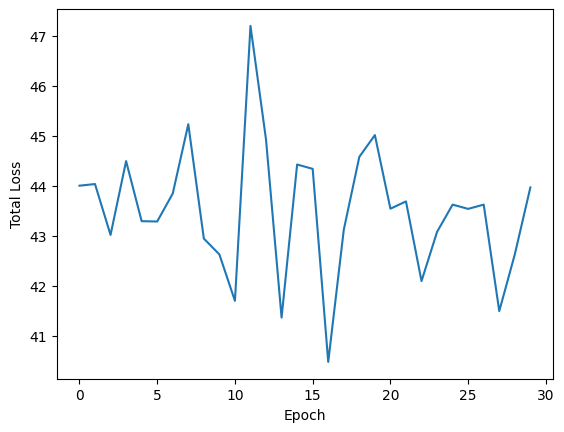

In [44]:
print(perceptron_algo_plot(X_data,Y_data))

Answer 4 :


1. The inclusion of a bias term introduces an extra parameter, enabling the algorithm to autonomously regulate the placement of the decision boundary without reliance on input features.

2. The bias term empowers the perceptron model to govern the activation threshold of the neuron, determining when it should or should not activate.

3. By incorporating a bias term, an intercept factor is introduced, capable of displacing the decision boundary from the origin. Consequently, the bias term permits the model to acquire a decision boundary that doesn't necessarily intersect the origin.

Answer 5:



1. If the learning rate is very high, the model might miss the best solution or keep jumping around it without settling down.

2. On the other hand, if the learning rate is really low, it takes a long time to find the best solution because it's moving in tiny steps.

3. Smaller learning rates make the updates to the model more steady. It's less likely to overshoot the best solution.